In [2]:
import os
import numpy as np
import random
import csv
import warnings
warnings.filterwarnings('ignore')

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

import pandas as pd

from smiles_util import *
%load_ext autoreload
%autoreload 2

In [3]:
# Data
path_data_labels = './data/jak2_data.csv' 

In [4]:
# Read in data and labels
s, l = read_smiles_labels(path_data_labels, label_name='pIC50')

In [5]:
# Binarize your data
def binarize(labels, threshold):
    binary_labels = np.array(np.array(labels) >= threshold, dtype = 'int32')
    return binary_labels

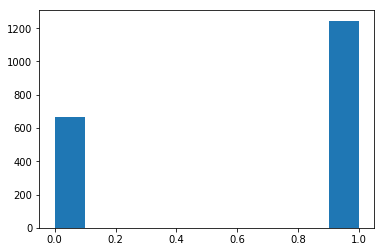

In [8]:
# Check distribution
import matplotlib.pyplot as plt
bl = binarize(l, threshold = 7.0)
plt.hist(bl);

In [9]:
from smiles_util import get_fingerprint as get_fp
# Get fingerprint
fp_train = get_fp(s)

In [13]:
from predictor import RandomForestQSAR

In [14]:
jak2_predictor = RandomForestQSAR(model_type='classifier', n_estimators=100)

In [19]:
cv_metric, metric_type = jak2_predictor.fit(s,bl)
print('AUC score of hold out set: {0:.2f}'.format(cv_metric[0]))

AUC score of hold out set: 0.78


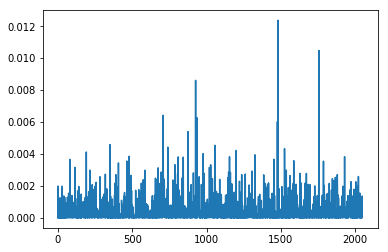

In [20]:
# Feature importance
plt.plot(jak2_predictor.model.feature_importances_)

In [21]:
# Cross validation score
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'roc_auc')
# Mean cross validation score
#scores.mean()